In [ ]:
!pip install pandas==1.3.3
!pip install requests==2.26.0
!mamba install bs4==4.10.0 -y
!mamba install html5lib==1.1 -y 
!pip install lxml==4.9.1
!pip install plotly==5.3.1

<class 'OSError'>: "sh" shell not found

In [1]:
# Enter url
url="https://docs.google.com/spreadsheets/d/1Le9cyaXi2NOX9eLLGB5COYrSoVLb2SQzZuEEtvaFwbc/edit?resourcekey#gid=1989112409"

<!DOCTYPE html><html lang="en-US"><head><script nonce="mPQmud3rkOsTWjqAf0HYKw">var DOCS_timing={}; DOCS_timing['pls']=new Date().getTime();</script><meta property="og:title" content="Survey Responses"><meta property="og:type" content="article"><meta property="og:site_name" content="Google Docs"><meta property="og:url" content="https://docs.google.com/spreadsheets/d/1Le9cyaXi2NOX9eLLGB5COYrSoVLb2SQzZuEEtvaFwbc/edit?resourcekey&amp;usp=embed_facebook"><meta property="og:image" content="https://lh3.googleusercontent.com/docs/AOD9vFqSirEBlbDlmh_-6M3wgs8uFYM-hbarA2Dsqn0uXAy-2qOsvpS_081VPBIdN32vIc-xwkGQ8wry1yO5n7B6p-KwVBc5jO4sc6LR2ukmsdSZ=w1200-h630-p"><meta property="og:image:width" content="1200"><meta property="og:image:height" content="630"><meta property="og:description" content="Instructor (Pre)

Timestamp,Have you read the entire curriculum?,How clear would you say the instructions are?,Were any parts of the curriculum instructions confusing? ,If you answered yes to the previous quest

([<matplotlib.patches.Wedge at 0x1a952832490>,
 [Text(6.735557395310444e-17, 1.1, 'Yes'),
  Text(-2.0206672185931328e-16, -1.1, 'No')])

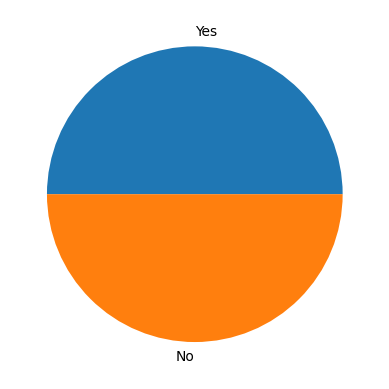

In [2]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

data  = requests.get(url).text
print(data)

soup = BeautifulSoup(data, 'html5lib')

Pre_Instructor_Survey_data = pd.DataFrame()

read_html_pandas_data = pd.read_html(url, index_col=0)

Pre_Instructor_Survey_data = read_html_pandas_data[0]

revised = Pre_Instructor_Survey_data.iloc[0:20]
rev1 = revised.dropna(how='all')
rev2 = rev1.dropna(axis='rows', how='all')
rev3 = rev2.dropna(axis='columns', how='all')

rev4 = rev3.fillna(0)

rev5 = rev4.iloc[1:20]
rev6 = []
for row in rev5["B"]:
    if (row == "Yes"):
        rev6.append(1)
    else:
        rev6.append(0)

no = rev6.count(0)
yes = rev6.count(1)

labels = 'Yes', 'No'
sizes = [yes, no]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)